<a href="https://colab.research.google.com/github/Hedif85/Application-Security-Tool/blob/main/Food_Waist_at_Hospital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing values:
 Date                  0
Food_Item             0
Quantity_Discarded    0
Patients              0
Weekday               0
dtype: int64

Top 3 Most Wasted Food Items:
 Food_Item
Milk              75
Yogurt            72
Protein Yogurt    70
Name: Quantity_Discarded, dtype: int64

Day with Highest Waste: 2024-04-01 (12 items discarded)

Total Weekend Waste: 146
Total Weekday Waste: 392
✅ More waste happens on weekdays.


<ipython-input-13-074deb18fd8b>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=waste_by_item.values, y=waste_by_item.index, palette='mako')


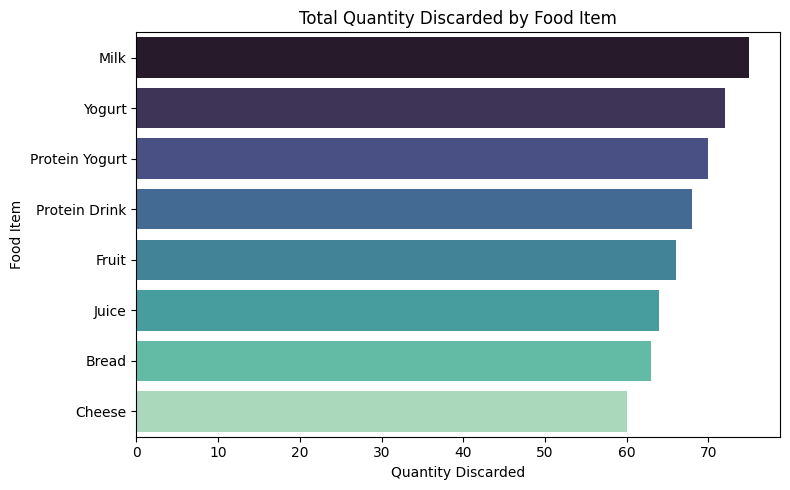

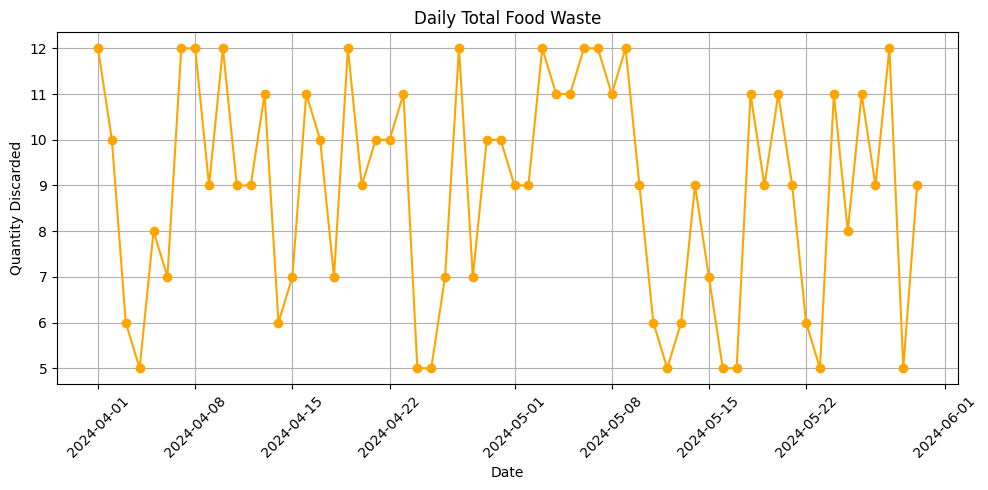

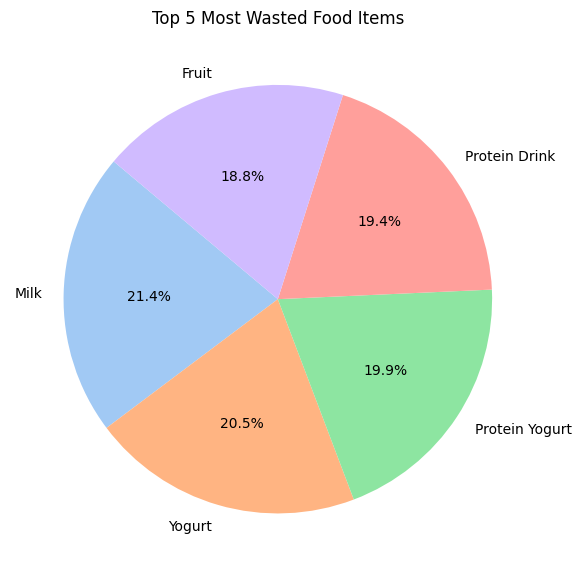

<ipython-input-13-074deb18fd8b>:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=waste_by_weekday.index, y=waste_by_weekday.values, palette='coolwarm')


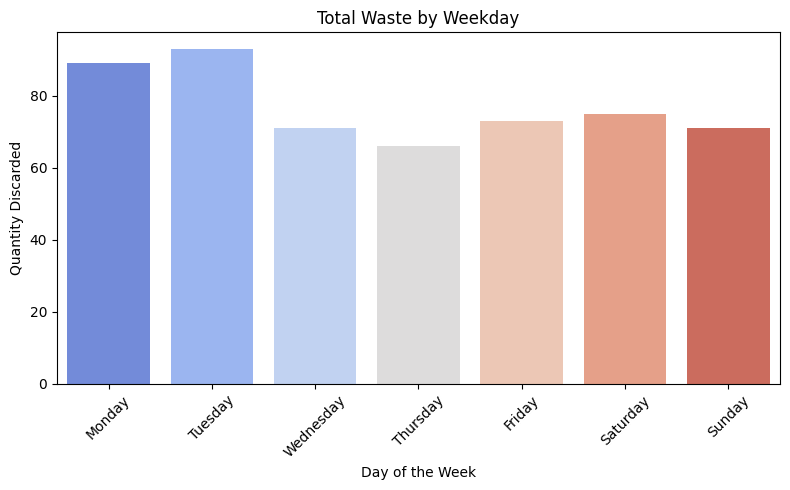


✅ Project Completed: Data cleaned, analyzed, visualized, and saved.


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create the dataset with 60 days of data
dates = pd.date_range(start='2024-04-01', periods=60, freq='D')

# Food items (repeating with Chicken and Salad removed, and Protein Yogurt and Protein Drink added)
food_items = ['Yogurt', 'Milk', 'Protein Yogurt', 'Fruit', 'Bread', 'Cheese', 'Juice', 'Protein Drink']
food_items = (food_items * 8)[:60]  # Repeat to match the 60 days

# Quantities discarded (generated based on number of patients, between 5 to 12 per day)
import random
quantities = [random.randint(5, 12) for _ in range(60)]

# Number of patients (between 5 to 12)
patients = [random.randint(5, 12) for _ in range(60)]

# Build DataFrame
data = {
    'Date': dates,
    'Food_Item': food_items,
    'Quantity_Discarded': quantities,
    'Patients': patients
}

df = pd.DataFrame(data)

# Add Weekday Column
df['Weekday'] = df['Date'].dt.day_name()

# 2. Basic Data Checking
print("Missing values:\n", df.isnull().sum())

# 3. Business Questions & Analysis

## Question 1: What are the top 3 most wasted food items?
waste_by_item = df.groupby('Food_Item')['Quantity_Discarded'].sum().sort_values(ascending=False)
top3_items = waste_by_item.head(3)
print("\nTop 3 Most Wasted Food Items:\n", top3_items)

## Question 2: On which days is waste highest?
daily_waste = df.groupby('Date')['Quantity_Discarded'].sum()
max_waste_day = daily_waste.idxmax()
print(f"\nDay with Highest Waste: {max_waste_day.date()} ({daily_waste[max_waste_day]} items discarded)")

## Question 3: Are weekends worse than weekdays?
df['Weekend'] = df['Weekday'].isin(['Saturday', 'Sunday'])
weekend_waste = df[df['Weekend'] == True]['Quantity_Discarded'].sum()
weekday_waste = df[df['Weekend'] == False]['Quantity_Discarded'].sum()

print(f"\nTotal Weekend Waste: {weekend_waste}")
print(f"Total Weekday Waste: {weekday_waste}")

if weekend_waste > weekday_waste:
    print("✅ More waste happens on weekends.")
else:
    print("✅ More waste happens on weekdays.")

# 4. Visualizations

## a. Total Waste by Food Item
plt.figure(figsize=(8,5))
sns.barplot(x=waste_by_item.values, y=waste_by_item.index, palette='mako')
plt.title('Total Quantity Discarded by Food Item')
plt.xlabel('Quantity Discarded')
plt.ylabel('Food Item')
plt.tight_layout()
plt.savefig('food_waste_summary.png')
plt.show()

## b. Daily Food Waste Trend
plt.figure(figsize=(10,5))
plt.plot(daily_waste.index, daily_waste.values, marker='o', linestyle='-', color='orange')
plt.title('Daily Total Food Waste')
plt.xlabel('Date')
plt.ylabel('Quantity Discarded')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('daily_food_waste_trend.png')
plt.show()

## c. Pie Chart of Top 5 Food Items Wasted
plt.figure(figsize=(6,6))
top5_items = waste_by_item.head(5)
plt.pie(top5_items.values, labels=top5_items.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Top 5 Most Wasted Food Items')
plt.tight_layout()
plt.savefig('top5_food_waste_pie.png')
plt.show()

## d. Waste by Weekday
waste_by_weekday = df.groupby('Weekday')['Quantity_Discarded'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

plt.figure(figsize=(8,5))
sns.barplot(x=waste_by_weekday.index, y=waste_by_weekday.values, palette='coolwarm')
plt.title('Total Waste by Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Quantity Discarded')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('waste_by_weekday.png')
plt.show()

# 5. Save Cleaned Dataset
df.to_csv('hospital_food_waste_data_extended.csv', index=False)

print("\n✅ Project Completed: Data cleaned, analyzed, visualized, and saved.")
